<a href="https://colab.research.google.com/github/AmnaShahid987/AmnaShahidLendingModels/blob/main/Seed_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
N = 3000  # Seed size for SDV

# -------------------------
# 1. AGE (22–65)
# -------------------------
age = np.random.randint(22, 66, N)

# -------------------------
# 2. MARITAL STATUS
# -------------------------
marital_status = []
for a in age:
    if a < 30:
        marital_status.append(np.random.choice(["Single", "Married"], p=[0.8, 0.2]))
    elif a < 45:
        marital_status.append(np.random.choice(["Single", "Married"], p=[0.45, 0.55]))
    else:
        marital_status.append(np.random.choice(["Single", "Married"], p=[0.25, 0.75]))

# -------------------------
# 3. EMPLOYMENT STATUS
# -------------------------
employment_status = []
for a in age:
    if a < 55:
        employment_status.append(
            np.random.choice(
                ["Salaried", "Self-Employed"],
                p=[0.6, 0.4]
            )
        )
    else:
        employment_status.append(
            np.random.choice(
                ["Salaried", "Self-Employed", "Pensioner"],
                p=[0.3, 0.2, 0.5]
            )
        )

# -------------------------
# 4. CITY
# -------------------------
cities = ["Karachi", "Lahore", "Islamabad", "Rawalpindi", "Faisalabad"]

city = np.random.choice(
    cities,
    size=N,
    p=[0.35, 0.30, 0.15, 0.10, 0.10]
)

# -------------------------
# 5. HOUSEHOLD DEPENDENTS (1–6)
# -------------------------
dependents = []
for ms, a in zip(marital_status, age):
    if ms == "Single":
        dependents.append(
            np.random.choice([1, 2, 3], p=[0.7, 0.2, 0.1])
        )
    else:  # Married → dependents >= 2
        if a < 30:
            dependents.append(np.random.choice([2, 3], p=[0.6, 0.4]))
        elif a < 45:
            dependents.append(np.random.choice([2, 3, 4], p=[0.4, 0.4, 0.2]))
        else:
            dependents.append(np.random.choice([3, 4, 5, 6], p=[0.3, 0.3, 0.25, 0.15]))

# -------------------------
# Assemble DataFrame
# -------------------------
seed_customer_df = pd.DataFrame({
    "age": age,
    "marital_status": marital_status,
    "employment_status": employment_status,
    "city": city,
    "household_dependents": dependents
})

# -------------------------
# Hard constraint checks (DO NOT SKIP)
# -------------------------
assert seed_customer_df["age"].between(22, 65).all()
assert seed_customer_df["household_dependents"].between(1, 6).all()
assert (seed_customer_df.loc[
    seed_customer_df["marital_status"] == "Married",
    "household_dependents"
] >= 2).all()

seed_customer_df.head()

,age,marital_status,employment_status,city,household_dependents
0,60,Married,Salaried,Lahore,3
1,50,Married,Salaried,Islamabad,4
2,36,Single,Salaried,Lahore,2
3,64,Married,Self-Employed,Islamabad,5
4,29,Single,Salaried,Lahore,1


In [ ]:
seed_customer_df.info()
seed_customer_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   3000 non-null   int64 
 1   marital_status        3000 non-null   object
 2   employment_status     3000 non-null   object
 3   city                  3000 non-null   object
 4   household_dependents  3000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


,age,marital_status,employment_status,city,household_dependents
count,3000.000000,3000,3000,3000,3000.000000
unique,NaN,2,3,5,NaN
top,NaN,Married,Salaried,Karachi,NaN
freq,NaN,1776,1578,1042,NaN
mean,43.552000,NaN,NaN,NaN,2.747667
std,12.583882,NaN,NaN,NaN,1.515507
min,22.000000,NaN,NaN,NaN,1.000000
25%,33.000000,NaN,NaN,NaN,1.000000
50%,44.000000,NaN,NaN,NaN,3.000000
75%,54.000000,NaN,NaN,NaN,4.000000


In [ ]:
# Married → dependents >= 2
assert (seed_customer_df.loc[
    seed_customer_df["marital_status"] == "Married",
    "household_dependents"
] >= 2).all()

import numpy as np
import pandas as pd

# Copy dataset to avoid mutating original
fixed_seed_df = seed_customer_df.copy()

# Identify invalid pensioners
invalid_pensioners = (
    (fixed_seed_df["employment_status"] == "Pensioner") &
    (fixed_seed_df["age"] < 60)
)

print(f"Invalid pensioners found: {invalid_pensioners.sum()}")

# Reassign employment status
fixed_seed_df.loc[invalid_pensioners, "employment_status"] = np.random.choice(
    ["Salaried", "Self-Employed"],
    size=invalid_pensioners.sum(),
    p=[0.65, 0.35]
)

# -------------------------
# Hard validation checks
# -------------------------
assert (
    fixed_seed_df.loc[
        fixed_seed_df["employment_status"] == "Pensioner",
        "age"
    ] >= 60
).all()

# -------------------------
# Save corrected dataset
# -------------------------
fixed_seed_df.to_csv("seed_customers_corrected.csv", index=False)

fixed_seed_df.head()



Invalid pensioners found: 179


,age,marital_status,employment_status,city,household_dependents,eligible
0,60,Married,Salaried,Lahore,3,1
1,50,Married,Salaried,Islamabad,4,1
2,36,Single,Salaried,Lahore,2,1
3,64,Married,Self-Employed,Islamabad,5,0
4,29,Single,Salaried,Lahore,1,1


employment_status,Pensioner,Salaried,Self-Employed
age,,,
20,0.000000,0.589744,0.410256
30,0.000000,0.595092,0.404908
40,0.000000,0.596615,0.403385
50,0.000000,0.588732,0.411268
60,0.469974,0.347258,0.182768


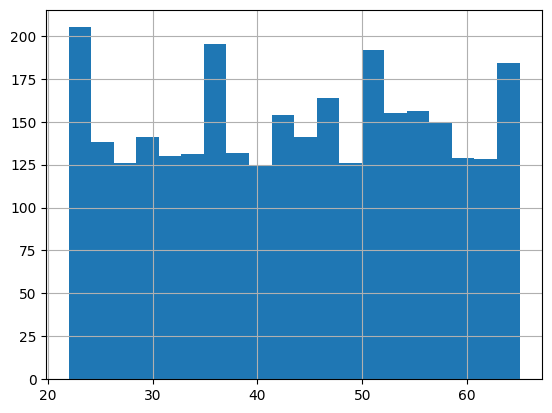

In [ ]:
#Checking for biases

def show_distribution(df, column):
    return (
        df[column]
        .value_counts(normalize=True)
        .rename("proportion")
        .reset_index()
    )

show_distribution(seed_customer_df, "marital_status")
show_distribution(seed_customer_df, "employment_status")
show_distribution(seed_customer_df, "city")

seed_customer_df["age"].hist(bins=20)

pd.crosstab(
    seed_customer_df["age"] // 10 * 10,
    seed_customer_df["marital_status"],
    normalize="index"
)

pd.crosstab(
    seed_customer_df["employment_status"],
    seed_customer_df["age"] // 10 * 10,
    normalize="index"
)

seed_customer_df.groupby("marital_status")["household_dependents"].describe()

pd.crosstab(
    seed_customer_df["city"],
    seed_customer_df["employment_status"],
    normalize="index"
)

seed_customer_df[["age", "household_dependents"]].corr()

#Fairness Check
seed_customer_df["eligible"] = (
    (seed_customer_df["age"] <= 60) &
    (seed_customer_df["employment_status"] != "Pensioner") &
    (seed_customer_df["household_dependents"] <= 5)
).astype(int)

pd.crosstab(
    seed_customer_df["employment_status"],
    seed_customer_df["eligible"],
    normalize="index"
)


pd.crosstab(
    fixed_seed_df["age"] // 10 * 10,
    fixed_seed_df["employment_status"],
    normalize="index"
)

In [ ]:
import pandas as pd

# fixed_seed_df is already defined and corrected from previous cells.

# Remove existing customer_id if it exists to avoid ValueError
if 'customer_id' in fixed_seed_df.columns:
    fixed_seed_df = fixed_seed_df.drop(columns=['customer_id'])

# Add customer_id directly to fixed_seed_df
# Modify this to only include numerical values
fixed_seed_df.insert(
    0,
    "customer_id",
    [int(str(i).zfill(6)) for i in range(1, len(fixed_seed_df) + 1)]
)

fixed_seed_df.head()


# -------------------------
# Save corrected dataset
# -------------------------
# Save the updated fixed_seed_df (now with customer_id)
fixed_seed_df.to_csv("seed_customers_corrected_1.csv", index=False)

fixed_seed_df.head()

,customer_id,age,marital_status,employment_status,city,household_dependents
0,1,60,Married,Salaried,Lahore,3
1,2,50,Married,Salaried,Islamabad,4
2,3,36,Single,Salaried,Lahore,2
3,4,64,Married,Self-Employed,Islamabad,5
4,5,29,Single,Salaried,Lahore,1


In [ ]:
fixed_seed_df.to_csv("seed_customers_corrected_1.csv", index=False)
print("DataFrame saved successfully to 'seed_customers_corrected_1.csv'")

DataFrame saved successfully to 'seed_customers_corrected_1.csv'


In [ ]:
fixed_seed_df = fixed_seed_df.drop(columns=['eligible'])
fixed_seed_df.head()

,age,marital_status,employment_status,city,household_dependents
0,60,Married,Salaried,Lahore,3
1,50,Married,Salaried,Islamabad,4
2,36,Single,Salaried,Lahore,2
3,64,Married,Self-Employed,Islamabad,5
4,29,Single,Salaried,Lahore,1


In [ ]:
fixed_seed_df.to_csv("seed_customers_final.csv", index=False)
print("DataFrame saved successfully to 'seed_customers_final.csv'")

DataFrame saved successfully to 'seed_customers_final.csv'


# Task
Generate a synthetic dataset of 50,000 records using the Synthetic Data Vault (SDV) library, based on the patterns learned from the `fixed_seed_df` loaded from "seed_customers_final.csv". Save the generated synthetic data to a CSV file named "synthetic_customers.csv".

## Install SDV Library

### Subtask:
Install the Synthetic Data Vault (SDV) library, if not already installed, to enable synthetic data generation.


**Reasoning**:
The subtask is to install the `sdv` library. I will use `!pip install sdv` in a code cell to install the library.



In [ ]:
pip install sdv
print("SDV library installed successfully.")

SyntaxError: invalid syntax (ipython-input-3482313662.py, line 1)

**Reasoning**:
The previous attempt to install the SDV library failed due to a `SyntaxError` because shell commands in Colab/Jupyter notebooks require a `!` prefix. I will add `!` before `pip install sdv` to execute it as a shell command.



In [ ]:
!pip install sdv
print("SDV library installed successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.5/198.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.5/198.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.2 MB/s eta 0:00:00
SDV library installed successfully.


**Reasoning**:
The subtask is to generate synthetic data. I will first load the `fixed_seed_df` from 'seed_customers_final.csv', then import the `SDV` library, define the metadata, train a `CTGAN` model on the real data, generate 50,000 synthetic records, and finally save the synthetic data to 'synthetic_customers.csv'.



In [ ]:
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGAN

# Load the fixed_seed_df from the saved CSV file
fixed_seed_df = pd.read_csv('seed_customers_final.csv')
print("Loaded fixed_seed_df from 'seed_customers_final.csv'")

# 1. Create a metadata object
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(fixed_seed_df)

# 2. Identify the primary key column
# Assuming 'customer_id' is the primary key as it was added in previous steps
metadata.set_primary_key(column_name='customer_id')

# 3. Train the CTGAN model
print("\nTraining CTGAN model...")
model = CTGAN(metadata)
model.fit(fixed_seed_df)
print("CTGAN model trained successfully.")

# 4. Generate 50,000 synthetic records
print("\nGenerating 50,000 synthetic records...")
synthetic_data = model.sample(num_rows=50000)
print("Synthetic data generated successfully.")

# 5. Save the generated synthetic data to a CSV file
synthetic_data.to_csv("synthetic_customers.csv", index=False)
print("\nSynthetic data saved to 'synthetic_customers.csv'.")

# Display the head of the synthetic data
synthetic_data.head()

ImportError: cannot import name 'CTGAN' from 'sdv.single_table' (/usr/local/lib/python3.12/dist-packages/sdv/single_table/__init__.py)

**Reasoning**:
The previous code failed because the `CTGAN` class could not be imported from `sdv.single_table`. In recent versions of the SDV library, the CTGAN model class has been renamed to `CTGANSynthesizer`. I will update the import statement and class instantiation to use `CTGANSynthesizer`.



In [ ]:
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer

# Load the fixed_seed_df from the saved CSV file
fixed_seed_df = pd.read_csv('seed_customers_final.csv')
print("Loaded fixed_seed_df from 'seed_customers_final.csv'")

# 1. Create a metadata object
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(fixed_seed_df)

# 2. Identify the primary key column
# Assuming 'customer_id' is the primary key as it was added in previous steps
metadata.set_primary_key(column_name='customer_id')

# 3. Train the CTGAN model
print("\nTraining CTGAN model...")
model = CTGANSynthesizer(metadata)
model.fit(fixed_seed_df)
print("CTGAN model trained successfully.")

# 4. Generate 50,000 synthetic records
print("\nGenerating 50,000 synthetic records...")
synthetic_data = model.sample(num_rows=50000)
print("Synthetic data generated successfully.")

# 5. Save the generated synthetic data to a CSV file
synthetic_data.to_csv("synthetic_customers.csv", index=False)
print("\nSynthetic data saved to 'synthetic_customers.csv'.")

# Display the head of the synthetic data
synthetic_data.head()

Loaded fixed_seed_df from 'seed_customers_final.csv'

Training CTGAN model...


/usr/local/lib/python3.12/dist-packages/sdv/metadata/single_table.py:835: UserWarning: There is an existing primary key 'customer_id'. This key will be removed.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


CTGAN model trained successfully.

Generating 50,000 synthetic records...
Synthetic data generated successfully.

Synthetic data saved to 'synthetic_customers.csv'.


,customer_id,age,marital_status,employment_status,city,household_dependents
0,1940815,55,Married,Pensioner,Matthewchester,3
1,12657432,35,Single,Self-Employed,Annaburgh,1
2,10174833,38,Married,Self-Employed,Port Brentborough,3
3,16497775,62,Married,Salaried,Millsburgh,5
4,6164702,52,Married,Self-Employed,Joseberg,4


**Reasoning**:
The previous output showed deprecation warnings for `SingleTableMetadata` and a recommendation to save the metadata. I will update the import to use the newer `Metadata` class and add a step to save the metadata to a JSON file for best practices.



In [ ]:
import pandas as pd
from sdv.metadata import Metadata
from sdv.single_table import CTGANSynthesizer

# Load the fixed_seed_df from the saved CSV file
fixed_seed_df = pd.read_csv('seed_customers_final.csv')
print("Loaded fixed_seed_df from 'seed_customers_final.csv'")

# 1. Create a metadata object
metadata = Metadata()
metadata.detect_from_dataframe(fixed_seed_df)

# 2. Identify the primary key column
# Assuming 'customer_id' is the primary key as it was added in previous steps
metadata.set_primary_key(column_name='customer_id')

# Save the metadata for replicability (addressing the UserWarning)
metadata.save_to_json('synthetic_customers_metadata.json')
print("Metadata saved to 'synthetic_customers_metadata.json'")

# 3. Train the CTGAN model
print("\nTraining CTGAN model...")
model = CTGANSynthesizer(metadata)
model.fit(fixed_seed_df)
print("CTGAN model trained successfully.")

# 4. Generate 50,000 synthetic records
print("\nGenerating 50,000 synthetic records...")
synthetic_data = model.sample(num_rows=50000)
print("Synthetic data generated successfully.")

# 5. Save the generated synthetic data to a CSV file
synthetic_data.to_csv("synthetic_customers.csv", index=False)
print("\nSynthetic data saved to 'synthetic_customers.csv'.")

# Display the head of the synthetic data
synthetic_data.head()

Loaded fixed_seed_df from 'seed_customers_final.csv'


ValueError: Metadata does not contain any tables. No columns can be added.

# Task
Generate a synthetic dataset of 50,000 records using the Synthetic Data Vault (SDV) library, based on the patterns learned from the `fixed_seed_df` loaded from "seed_customers_final.csv". Save the generated synthetic data to a CSV file named "synthetic_customers.csv".

## Fix SDV Installation Command

### Subtask:
Modify the `pip install sdv` command to `!pip install sdv` to ensure it executes correctly in the notebook environment.


**Reasoning**:
The previous attempt to install the SDV library failed due to a `SyntaxError` because shell commands in Colab/Jupyter notebooks require a `!` prefix. I will add `!` before `pip install sdv` to execute it as a shell command, as per the instructions.



In [ ]:
!pip install sdv
print("SDV library installed successfully.")

SDV library installed successfully.


## Initialize and Train SDV Model (Retry)

### Subtask:
Correctly initialize the SDV metadata, train the `CTGANSynthesizer` model using the `fixed_seed_df` and generate 50,000 synthetic records.


**Reasoning**:
The previous attempt to initialize metadata failed because the `Metadata` object requires a table to be explicitly added before setting a primary key. I will follow the instructions to first load the dataframe, create a `Metadata` object, then add the `fixed_seed_df` as a table named 'customers' to the metadata, set the primary key, save the metadata, train the `CTGANSynthesizer` model, generate synthetic data, and finally display its head.



In [ ]:
import pandas as pd
from sdv.metadata import Metadata
from sdv.single_table import CTGANSynthesizer

# 1. Load the fixed_seed_df from the saved CSV file
fixed_seed_df = pd.read_csv('seed_customers_final.csv')
print("Loaded fixed_seed_df from 'seed_customers_final.csv'")

# 2. Create a metadata object
metadata = Metadata()

# 3. Add the fixed_seed_df to the metadata object
metadata.add_table(table_name='customers', data=fixed_seed_df)
print("Added 'fixed_seed_df' as 'customers' table to metadata.")

# 4. Set 'customer_id' as the primary key for the 'customers' table
metadata.set_primary_key(column_name='customer_id', table_name='customers')
print("Primary key 'customer_id' set for 'customers' table.")

# 5. Save the metadata for replicability
metadata.save_to_json('synthetic_customers_metadata.json')
print("Metadata saved to 'synthetic_customers_metadata.json'")

# 6. Instantiate CTGANSynthesizer model with the metadata object
print("\nTraining CTGAN model...")
model = CTGANSynthesizer(metadata.tables['customers'])

# 7. Fit the CTGANSynthesizer model to the fixed_seed_df
model.fit(fixed_seed_df)
print("CTGAN model trained successfully.")

# 8. Generate 50,000 synthetic records
print("\nGenerating 50,000 synthetic records...")
synthetic_data = model.sample(num_rows=50000)
print("Synthetic data generated successfully.")

# Save the generated synthetic data to a CSV file
synthetic_data.to_csv("synthetic_customers.csv", index=False)
print("\nSynthetic data saved to 'synthetic_customers.csv'.")

# 9. Display the head of the synthetic data
synthetic_data.head()

Loaded fixed_seed_df from 'seed_customers_final.csv'


TypeError: MultiTableMetadata.add_table() got an unexpected keyword argument 'data'

**Reasoning**:
The previous code failed because the `metadata.add_table()` method does not accept a `data` argument as a keyword. For single-table datasets, the `Metadata.single_table_from_dataframe()` method is the correct way to initialize the metadata directly from a DataFrame in newer SDV versions. I will modify the code to use this method to correctly initialize the metadata, then proceed with setting the primary key, saving metadata, training the synthesizer, generating synthetic data, and saving it.



In [ ]:
import pandas as pd
from sdv.metadata import Metadata
from sdv.single_table import CTGANSynthesizer

# 1. Load the fixed_seed_df from the saved CSV file
fixed_seed_df = pd.read_csv('seed_customers_final.csv')
print("Loaded fixed_seed_df from 'seed_customers_final.csv'")

# 2. Create a metadata object directly from the DataFrame for a single table
metadata = Metadata.single_table_from_dataframe(fixed_seed_df)
print("Metadata created from 'fixed_seed_df'.")

# 3. Set 'customer_id' as the primary key
metadata.set_primary_key(column_name='customer_id')
print("Primary key 'customer_id' set.")

# 4. Save the metadata for replicability
metadata.save_to_json('synthetic_customers_metadata.json')
print("Metadata saved to 'synthetic_customers_metadata.json'")

# 5. Instantiate CTGANSynthesizer model with the metadata object
print("\nTraining CTGAN model...")
model = CTGANSynthesizer(metadata)

# 6. Fit the CTGANSynthesizer model to the fixed_seed_df
model.fit(fixed_seed_df)
print("CTGAN model trained successfully.")

# 7. Generate 50,000 synthetic records
print("\nGenerating 50,000 synthetic records...")
synthetic_data = model.sample(num_rows=50000)
print("Synthetic data generated successfully.")

# Save the generated synthetic data to a CSV file
synthetic_data.to_csv("synthetic_customers.csv", index=False)
print("\nSynthetic data saved to 'synthetic_customers.csv'.")

# 8. Display the head of the synthetic data
synthetic_data.head()

Loaded fixed_seed_df from 'seed_customers_final.csv'


AttributeError: type object 'Metadata' has no attribute 'single_table_from_dataframe'